## 加载数据

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import seaborn as sns
datingTest = pd.read_table('datingTestSet.txt'
                           ,header=None
                          )
# myfont=FontProperties(fname=r'C:\Windows\Fonts\SIMYOU.ttf',size=8)
# sns.set(font=myfont.get_name())
datingTest.head()

FileNotFoundError: File b'datingTestSet.txt' does not exist

In [44]:
# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
#plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# MacOS请参考 http://wenda.chinahadoop.cn/question/5304 修改字体配置

In [45]:
dict_data={'每年飞行常客里程':datingTest.iloc[:,0],
        '玩游戏视频所占时间比':datingTest.iloc[:,1],
        '每周消费冰淇淋公升数':datingTest.iloc[:,2],
        '类型':datingTest.iloc[:,3]}
new_data= pd.DataFrame(dict_data)
new_data.head()

,每周消费冰淇淋公升数,每年飞行常客里程,玩游戏视频所占时间比,类型
0,0.953952,40920,8.326976,largeDoses
1,1.673904,14488,7.153469,smallDoses
2,0.805124,26052,1.441871,didntLike
3,0.428964,75136,13.147394,didntLike
4,0.134296,38344,1.669788,didntLike


In [46]:
#sns.pairplot(data=new_data, hue='类型', vars=['每周消费冰淇淋公升数', '每年飞行常客里程', '玩游戏视频所占时间比'])

##  分析数据
##  显示数据

<IPython.core.display.Javascript object>


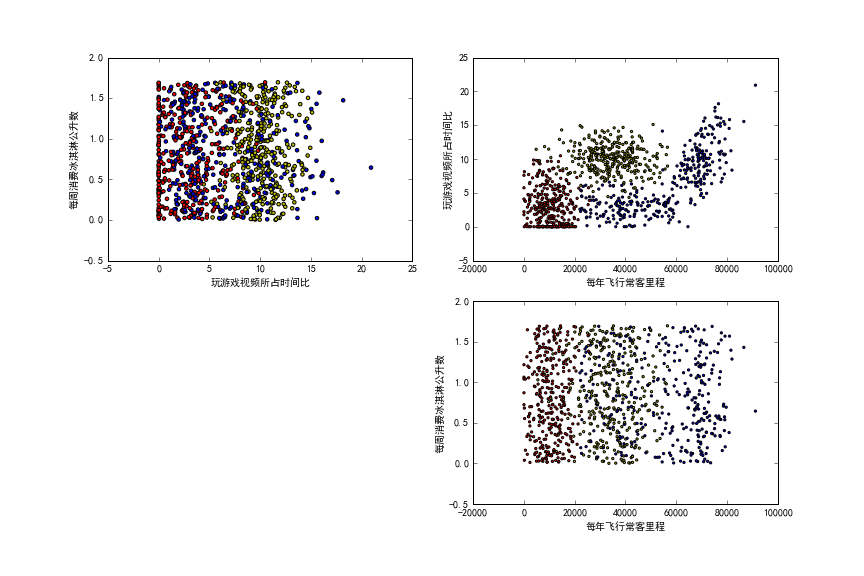

In [47]:
%matplotlib notebook
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
#把不同标签用颜色区分
Colors = []
for i in range(datingTest.shape[0]):
    m = datingTest.iloc[i,-1]
    if m=='didntLike':
        Colors.append('blue')
    if m=='smallDoses':
        Colors.append('red')
    if m=='largeDoses':
        Colors.append('y')
#绘制两两特征之间的散点图        

pl=plt.figure(figsize=(12,8))
fig1=pl.add_subplot(221)
plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],s=50,marker='.',c=Colors)
plt.xlabel('玩游戏视频所占时间比')
plt.ylabel('每周消费冰淇淋公升数')
fig2=pl.add_subplot(222)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker='.',c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('玩游戏视频所占时间比')
fig2=pl.add_subplot(224)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker='.',c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('每周消费冰淇淋公升数')
plt.show()

In [48]:
"""
函数功能：归一化
参数说明：
dataSet:原始数据集
返回：0-1标准化之后的数据集
"""
def minmax(dataSet):
    minDf = dataSet.min()
    maxDf = dataSet.max()
    normSet = (dataSet - minDf )/(maxDf - minDf)
    return normSet

In [49]:
dataSet = datingTest.iloc[:, :3]
dataSet
dataSet.min()
dataSet.max()
(dataSet - dataSet.min() )/(dataSet.max() - dataSet.min())

,0,1,2
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578
5,0.799722,0.484802,0.608961
6,0.393851,0.326530,0.715335
7,0.467455,0.634645,0.320312
8,0.739507,0.412612,0.441536
9,0.388757,0.586690,0.889360


In [50]:
datingT = pd.concat([minmax(datingTest.iloc[:, :3]), datingTest.iloc[:,3]], axis=1)
datingT.head()

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike


In [51]:
"""
函数功能：切分训练集和测试集
参数说明：
dataSet:原始数据集
rate:训练集所占比例
返回：切分好的训练集和测试集
"""
def randSplit(dataSet,rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test.index = range(test.shape[0])
    return train,test

In [52]:
dataSet = datingT
n = dataSet.shape[0]
m = int(n*0.9)
train = dataSet.iloc[:m,:]
test = dataSet.iloc[m:,:]
test.index = range(test.shape[0])
test.head()

,0,1,2,3
0,0.513766,0.170320,0.262181,didntLike
1,0.089599,0.154426,0.785277,smallDoses
2,0.611167,0.172689,0.915245,didntLike
3,0.012578,0.000000,0.195477,smallDoses
4,0.110241,0.187926,0.287082,smallDoses


In [53]:
train,test = randSplit(datingT)
train
test

,0,1,2,3
0,0.513766,0.170320,0.262181,didntLike
1,0.089599,0.154426,0.785277,smallDoses
2,0.611167,0.172689,0.915245,didntLike
3,0.012578,0.000000,0.195477,smallDoses
4,0.110241,0.187926,0.287082,smallDoses
5,0.812113,0.705201,0.681085,didntLike
6,0.729712,0.490545,0.960202,didntLike
7,0.130301,0.133239,0.926158,smallDoses
8,0.557755,0.722409,0.780811,largeDoses
9,0.437051,0.247835,0.131156,largeDoses


In [54]:
"""
函数功能：k-近邻算法分类器
参数说明：
train:训练集
test：测试集
k:k-近邻参数，即选择距离最小的k个点
返回：预测好分类的测试集
"""
def datingClass(train,test,k):
    n = train.shape[1] - 1                  
    m = test.shape[0]                        
    result = []                    
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) ** 2).sum(1))**5)
        dist_l = pd.DataFrame({'dist': dist, 'labels': (train.iloc[:, n])})
        dr = dist_l.sort_values(by = 'dist')[: k]
        re = dr.loc[:, 'labels'].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test['predict'] = result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean()
    return acc

In [62]:
acc = datingClass(train,test,3)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
test

,0,1,2,3,predict
0,0.513766,0.170320,0.262181,didntLike,didntLike
1,0.089599,0.154426,0.785277,smallDoses,smallDoses
2,0.611167,0.172689,0.915245,didntLike,didntLike
3,0.012578,0.000000,0.195477,smallDoses,smallDoses
4,0.110241,0.187926,0.287082,smallDoses,smallDoses
5,0.812113,0.705201,0.681085,didntLike,didntLike
6,0.729712,0.490545,0.960202,didntLike,didntLike
7,0.130301,0.133239,0.926158,smallDoses,smallDoses
8,0.557755,0.722409,0.780811,largeDoses,largeDoses
9,0.437051,0.247835,0.131156,largeDoses,didntLike


In [64]:
(test.iloc[:,-1]==test.iloc[:,-2]).mean()

0.93999999999999995

In [ ]:
datingClass(train,test,5)

In [ ]:
test

In [ ]:
print(help(sns.pairplot))